In [ ]:
# -----------------------------------------------------------
# 📌 1. IMPORTACIÓN DE LIBRERÍAS
# -----------------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

# Configuración visual de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)



In [ ]:
# -----------------------------------------------------------
# 📥 2. CARGA DE DATOS DESDE EL JSON EN GITHUB
# -----------------------------------------------------------

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
data = requests.get(url).json()

# Convertimos el JSON anidado en un DataFrame tabular
df = pd.json_normalize(data)

# Mostramos los nombres de columnas disponibles
print("Columnas del DataFrame:")
print(df.columns.tolist())

# Vista previa de los datos
df.head()

Columnas del DataFrame:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# -----------------------------------------------------------
# 🧼 3. LIMPIEZA BÁSICA
# -----------------------------------------------------------

# Eliminamos registros duplicados si los hubiera
df.drop_duplicates(inplace=True)

# Mostramos cuántos valores nulos hay por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificamos y convertimos la columna 'Churn' a valores binarios si es de tipo texto
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


Valores nulos por columna:
customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total          0
dtype: int64


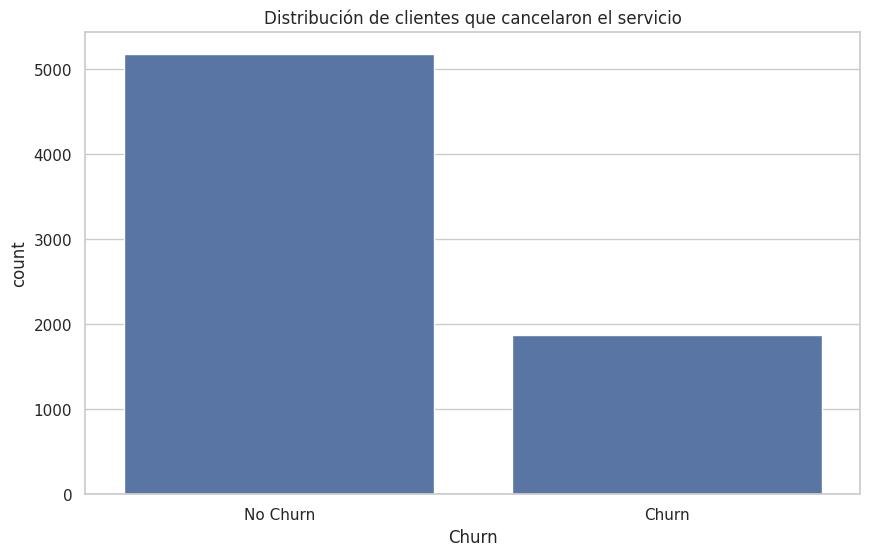

In [ ]:
# -----------------------------------------------------------
# 📊 4.1 ANÁLISIS EXPLORATORIO: DISTRIBUCIÓN DE CHURN
# -----------------------------------------------------------

# Cuántos clientes cancelaron vs. no cancelaron
sns.countplot(x='Churn', data=df)
plt.title('Distribución de clientes que cancelaron el servicio')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


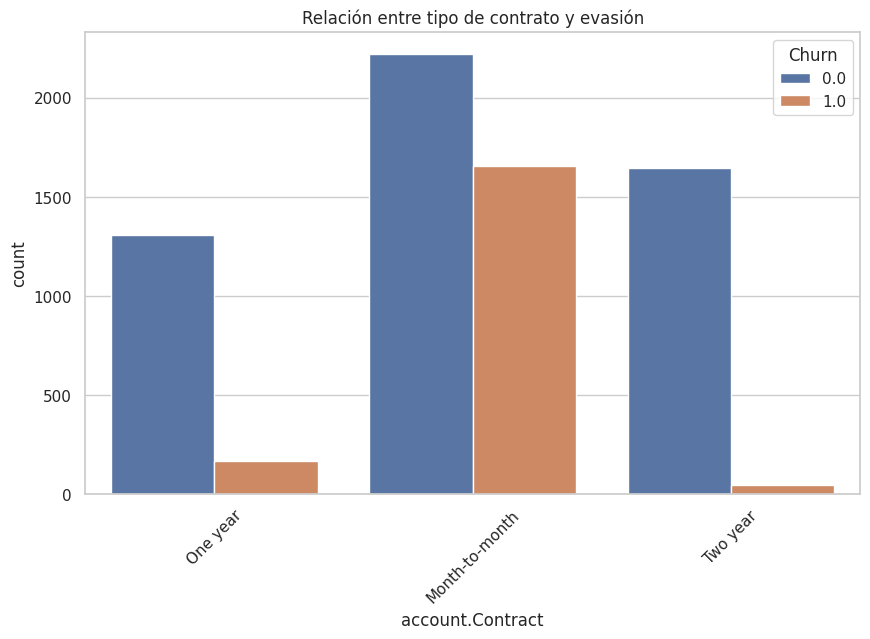

In [ ]:
# -----------------------------------------------------------
# 📊 4.2 ANÁLISIS DE VARIABLES CATEGÓRICAS VS CHURN
# -----------------------------------------------------------

# Analizamos la relación entre tipo de contrato y evasión
sns.countplot(data=df, x='account.Contract', hue='Churn')
plt.title('Relación entre tipo de contrato y evasión')
plt.xticks(rotation=45)
plt.show()


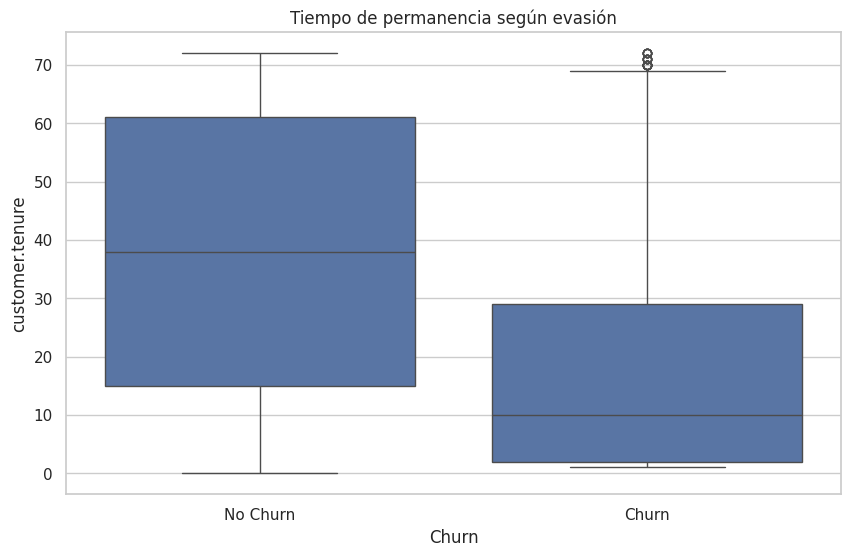

In [ ]:
# -----------------------------------------------------------
# 📊 4.3 ANÁLISIS DE VARIABLES NUMÉRICAS VS CHURN
# -----------------------------------------------------------

# Analizamos cómo varía el tiempo de permanencia entre clientes que cancelan y los que no
sns.boxplot(data=df, x='Churn', y='customer.tenure')
plt.title("Tiempo de permanencia según evasión")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


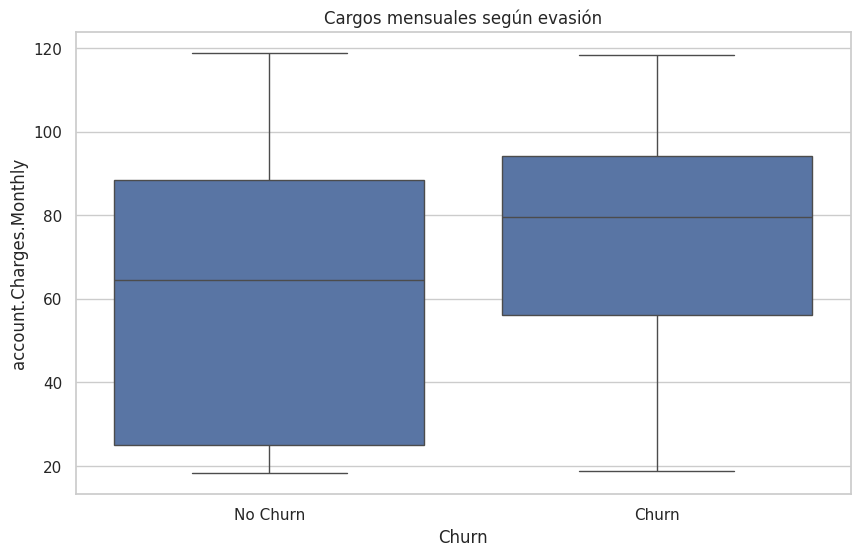

In [ ]:
# -----------------------------------------------------------
# 📊 4.4 OTRO EJEMPLO: CARGOS MENSUALES VS CHURN
# -----------------------------------------------------------

# Vemos si los clientes que pagan más tienden a cancelar
sns.boxplot(data=df, x='Churn', y='account.Charges.Monthly')
plt.title("Cargos mensuales según evasión")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


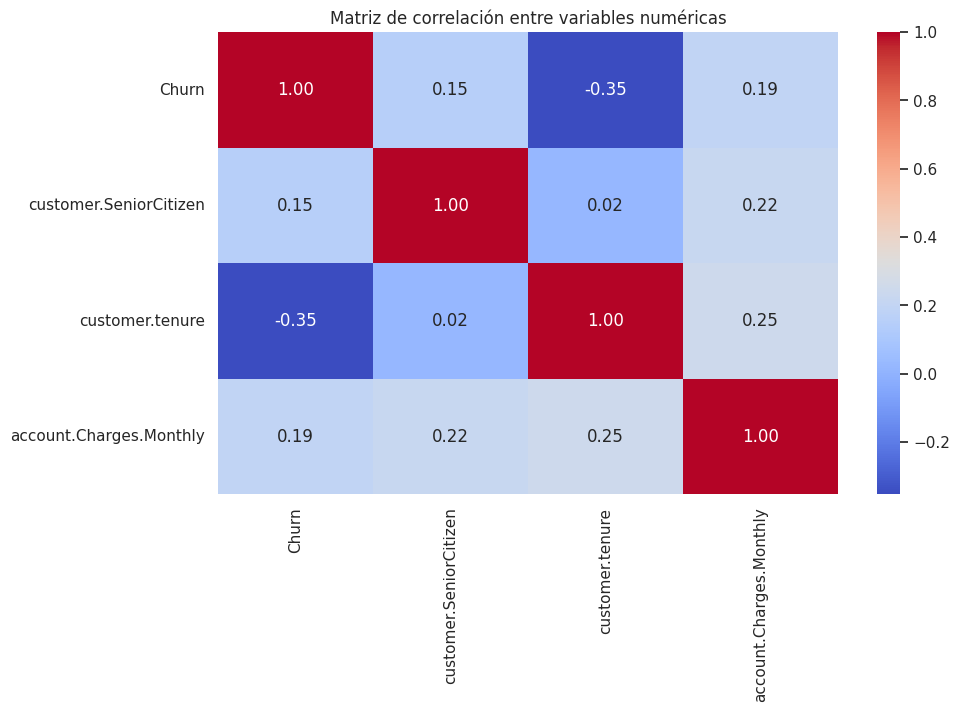

In [ ]:
# -----------------------------------------------------------
# 🔍 5. ANÁLISIS DE CORRELACIÓN (EXTRA)
# -----------------------------------------------------------

# Convertir otras columnas si es necesario
df_corr = df.select_dtypes(include=['int64', 'float64'])

correlaciones = df_corr.corr()

sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


In [ ]:
# -----------------------------------------------------------
# 📋 6. CONCLUSIONES Y RECOMENDACIONES
# -----------------------------------------------------------

from IPython.display import Markdown as md

md("""
### ✅ Conclusiones

- Los contratos **mensuales** tienen una mayor tasa de cancelación.
- Clientes con **poco tiempo** en la empresa (bajo `tenure`) tienden a cancelar más.
- Los **cargos mensuales altos** también están asociados a mayor evasión.

### 💡 Recomendaciones

- Ofrecer promociones o descuentos a clientes nuevos (con bajo tenure).
- Incentivar contratos **anuales o de largo plazo**.
- Implementar alertas tempranas para clientes con riesgo de churn basado en estos patrones.
""")



### ✅ Conclusiones

- Los contratos **mensuales** tienen una mayor tasa de cancelación.
- Clientes con **poco tiempo** en la empresa (bajo `tenure`) tienden a cancelar más.
- Los **cargos mensuales altos** también están asociados a mayor evasión.

### 💡 Recomendaciones

- Ofrecer promociones o descuentos a clientes nuevos (con bajo tenure).
- Incentivar contratos **anuales o de largo plazo**.
- Implementar alertas tempranas para clientes con riesgo de churn basado en estos patrones.
